## Build a simple linear regression model by performing EDA and do necessary transformations

## Q2. Salary_hike -> Build a prediction model for Salary_hike.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as smf
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv("C:/Users/Dhanashree/Downloads/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
dataset.shape

(30, 2)

In [9]:
# Renaming 
data = dataset.rename(columns={'YearsExperience':'YExp','Salary':'Sal'}, inplace=False)
data

,YExp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YExp'>

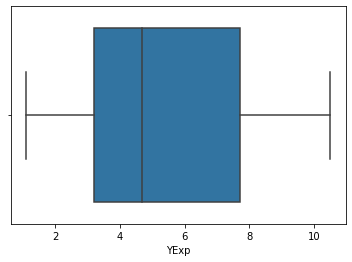

In [10]:
sns.boxplot(data['YExp'], orient = 'h')

C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YExp', ylabel='Density'>

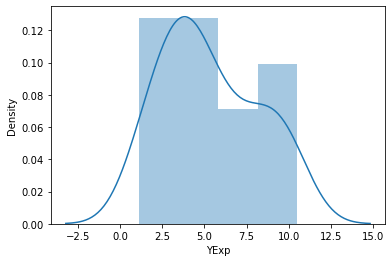

In [11]:
sns.distplot(data['YExp'])

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [13]:
print(skew(data.YExp))
print(kurtosis(data.YExp))

0.3603123252525561
-1.0447521989892943


C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sal'>

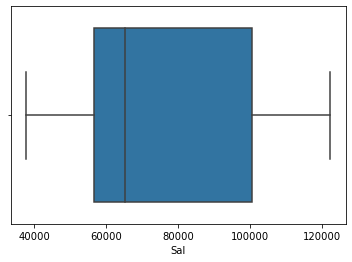

In [14]:
sns.boxplot(data['Sal'], orient='h')

C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sal', ylabel='Density'>

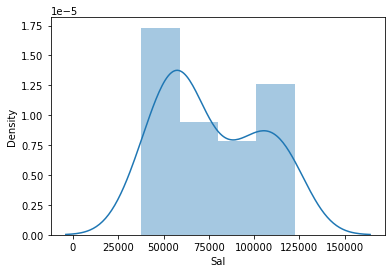

In [15]:
sns.distplot(data['Sal'])

In [16]:
print(skew(data.Sal))
print(kurtosis(data.Sal))

0.3361618825592921
-1.2829125042427751


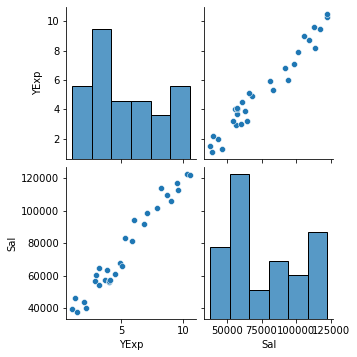

In [17]:
sns.pairplot(data)

### Correlation Analysis

In [18]:
data.corr()

,YExp,Sal
YExp,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

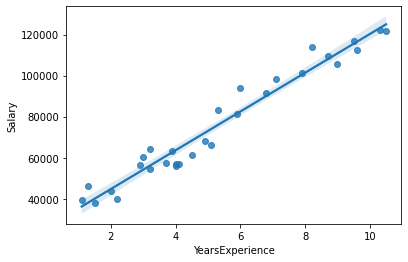

In [19]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

### Model Bulding

In [20]:
model=smf.ols('Salary~YearsExperience',data=dataset).fit()
model

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        21:51:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Testing

In [22]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [24]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [25]:
# sqrt vaqlues
np.sqrt(model.rsquared)

0.9782416184887599

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        21:51:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using log

In [27]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=dataset).fit()
model2

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        21:51:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues) 

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [30]:
model2.rsquared,model2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

### R Square values

In [31]:
model3=smf.ols("Salary~np.log(YearsExperience)",data=dataset).fit()
model3

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        21:51:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues) 

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [34]:
model3.rsquared,model3.rsquared_adj

(0.853888882875697, 0.8486706286926862)

### Using Square-root

In [35]:
model4=smf.ols("Salary~np.log(YearsExperience)",data=dataset).fit()
model4

In [36]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        21:51:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [38]:
model4.rsquared,model4.rsquared_adj

(0.853888882875697, 0.8486706286926862)

### Model Predictions

In [39]:
# Manual prediction for say 2 Years Experience
Salary = (25792.200199) + (9449.962321)*(2)
Salary

44692.124841

In [40]:
# Automatic Prediction for say 2 and 6 Years Experience
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [42]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64

In [43]:
pred1=model.predict(dataset);pred2=model2.predict(dataset);
pred3=model3.predict(dataset);pred4=model4.predict(dataset);

In [44]:
pred1;pred2;pred3;pred4;

In [45]:
dataset["pred1"]=pred1
dataset
dataset["pred2"]=pred2
dataset
dataset["pred3"]=pred3
dataset
dataset["pred4"]=pred4
dataset

,YearsExperience,Salary,pred1,pred2,pred3,pred4
0,1.1,39343.0,36187.158752,18795.848339,18795.848339,18795.848339
1,1.3,46205.0,38077.151217,25575.235192,25575.235192,25575.235192
2,1.5,37731.0,39967.143681,31382.551905,31382.551905,31382.551905
3,2.0,43525.0,44692.124842,43057.262306,43057.262306,43057.262306
4,2.2,39891.0,46582.117306,46925.138875,46925.138875,46925.138875
5,2.9,56642.0,53197.090931,58136.050079,58136.050079,58136.050079
6,3.0,60150.0,54142.087163,59511.842441,59511.842441,59511.842441
7,3.2,54445.0,56032.079627,62130.943929,62130.943929,62130.943929
8,3.2,64445.0,56032.079627,62130.943929,62130.943929,62130.943929
9,3.7,57189.0,60757.060788,68022.718504,68022.718504,68022.718504


In [46]:
# pred1 = prediction of model with our original data

# pred2 = prediction of log model with our original data

# pred3 = prediction of sqaure model with our original data

# pred4 = prediction of sqaure root model with our original data